In [351]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta

import matplotlib as mpl

In [352]:
StartingAmount = 500_000

import libaries

In [353]:
stock = "GOOGL"
daysHistory = 500
start = (date.today()-timedelta(daysHistory))

end = date.today()

df = web.DataReader(stock,'yahoo',start,end)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-14,1557.000000,1505.109985,1531.650024,1508.829956,2133000,1508.829956
2020-09-15,1550.989990,1522.099976,1527.890015,1535.119995,1152100,1535.119995
2020-09-16,1554.369995,1511.589966,1542.479980,1512.089966,1106400,1512.089966
2020-09-17,1498.660034,1462.459961,1485.810059,1487.040039,2000400,1487.040039
2020-09-18,1495.199951,1431.619995,1488.300049,1451.089966,3152800,1451.089966
...,...,...,...,...,...,...
2022-01-21,2697.310059,2601.729980,2651.870117,2607.030029,2774100,2607.030029
2022-01-24,2624.060059,2490.000000,2519.560059,2616.080078,3834700,2616.080078
2022-01-25,2587.979980,2530.010010,2574.800049,2538.699951,2348000,2538.699951


In [354]:
df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=30).mean()

df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()



In [355]:
df = df[df['Price_Moving_Avg'].notna()]

df

,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg
Date,,,,,,,,
2020-10-23,1634.119995,1611.910034,1615.050049,1632.979980,1527400,1632.979980,1503.367322,1.801023e+06
2020-10-26,1629.579956,1567.780029,1615.000000,1584.290039,1791300,1584.290039,1505.882658,1.789633e+06
2020-10-27,1602.000000,1576.989990,1588.930054,1598.880005,1295100,1598.880005,1508.007992,1.794400e+06
2020-10-28,1553.810059,1508.479980,1550.010010,1510.800049,2258700,1510.800049,1507.964994,1.832810e+06
2020-10-29,1588.739990,1516.550049,1517.020020,1556.880005,2770300,1556.880005,1510.292993,1.858473e+06
...,...,...,...,...,...,...,...,...
2022-01-21,2697.310059,2601.729980,2651.870117,2607.030029,2774100,2607.030029,2842.202669,1.526870e+06
2022-01-24,2624.060059,2490.000000,2519.560059,2616.080078,3834700,2616.080078,2830.979671,1.615910e+06
2022-01-25,2587.979980,2530.010010,2574.800049,2538.699951,2348000,2538.699951,2816.935335,1.653413e+06


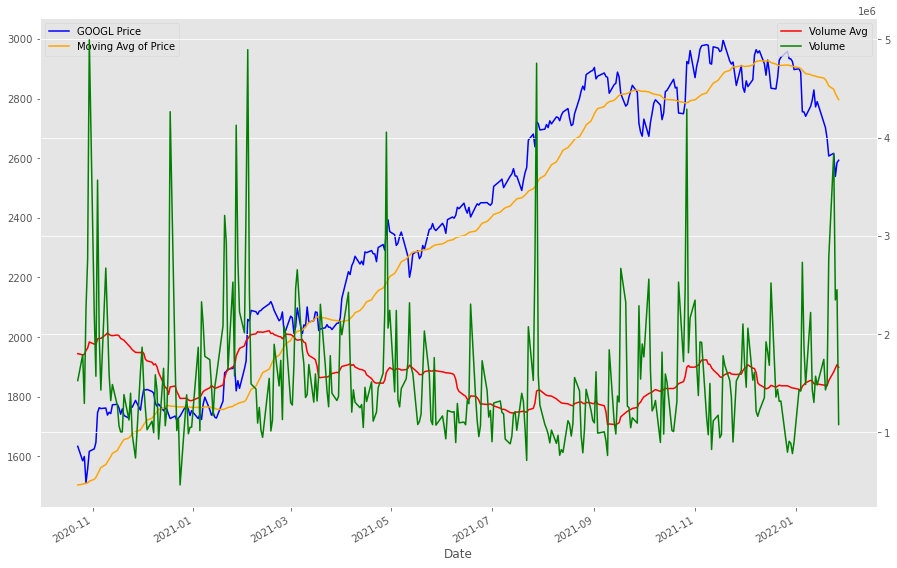

In [356]:
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]
volumePlot = df['Volume']
mpl.rc('figure',figsize=(15,10))
#mpl.style.use('ggplot')

close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
vmagplot.plot(secondary_y=True,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')
mpl.pyplot.legend()
mpl.pyplot.show()
#AddPriceMoving Avg

In [357]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
# adj close . lt - Price moving

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

<ipython-input-357-8028a4bc7bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
<ipython-input-357-8028a4bc7bdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])


,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg,Price Lower than MAVG,Volume Higher than MAVG
Date,,,,,,,,,,
2020-10-23,1634.119995,1611.910034,1615.050049,1632.979980,1527400,1632.979980,1503.367322,1.801023e+06,False,True
2020-10-26,1629.579956,1567.780029,1615.000000,1584.290039,1791300,1584.290039,1505.882658,1.789633e+06,False,False
2020-10-27,1602.000000,1576.989990,1588.930054,1598.880005,1295100,1598.880005,1508.007992,1.794400e+06,False,True
2020-10-28,1553.810059,1508.479980,1550.010010,1510.800049,2258700,1510.800049,1507.964994,1.832810e+06,False,False
2020-10-29,1588.739990,1516.550049,1517.020020,1556.880005,2770300,1556.880005,1510.292993,1.858473e+06,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-01-21,2697.310059,2601.729980,2651.870117,2607.030029,2774100,2607.030029,2842.202669,1.526870e+06,True,False
2022-01-24,2624.060059,2490.000000,2519.560059,2616.080078,3834700,2616.080078,2830.979671,1.615910e+06,True,False
2022-01-25,2587.979980,2530.010010,2574.800049,2538.699951,2348000,2538.699951,2816.935335,1.653413e+06,True,False


In [358]:
z=1
PL=0.00
Total_Gain =0
starting_price =1
#PG -> Per_Gain

Start_Price = (df['Adj Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Adj Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)

ROIcalc =0


benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 1632.97998046875
End Price: 2592.780029296875
293879.91901548376


In [359]:
for index,row in df.iterrows():
    if row['Volume Higher than MAVG']==1:
        if row['Price Lower than MAVG']==1:
            if z==1:
                print(index,row['Adj Close'], '- BUY')
                close_adj = row['Adj Close']
                #PL = PL - close_adj
                starting_price = close_adj
                z -=1
                #agg indiv fractions
    else:
        if row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
                if z==0:
                    print(index,row['Adj Close'],'- SELL')
                    close_adj = row['Adj Close']
                    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                    Total_Gain += single_trade_percent_gain

                    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                    print()
                    z+=1
        else:
            if (((row['Adj Close']- starting_price)/starting_price) * 100) > 1:
                if z==0:
                    print(index,row['Adj Close'],'- SELL DUE TO INCREASE IN %')
                    close_adj = row['Adj Close']
                    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                    Total_Gain += single_trade_percent_gain
                    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                    print()
                    z+=1

if(z==0):
    print(index,row['Adj Close'],'- SELL DUE TO LAST DAY')
    close_adj = row['Adj Close']
    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
    Total_Gain += single_trade_percent_gain
    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
TotalReturn = (Total_Gain/100) * StartingAmount
print()
print("The return for holding start to end was: "+str(Hold_Return_Per)+".")
print()
print("Return percentage from all trades: " + str(round(Total_Gain,2))+"% based on "+str(daysHistory)+" days of data")
print("With a starting amount of: $"+str(round(StartingAmount,3))+" it ended with a profit of: $"+str(round(TotalReturn,3)))
print("This algoritm has gained you: $"+str(round(StartingAmount+TotalReturn,3)))


2020-12-15 00:00:00 1761.0799560546875 - BUY
2020-12-28 00:00:00 1773.9599609375 - SELL
This trade gain/loss results: 0.73%

2020-12-29 00:00:00 1757.760009765625 - BUY
2021-01-07 00:00:00 1774.3399658203125 - SELL
This trade gain/loss results: 0.94%

2021-01-12 00:00:00 1737.4300537109375 - BUY
2021-01-19 00:00:00 1784.469970703125 - SELL
This trade gain/loss results: 2.71%

2021-03-08 00:00:00 2007.5 - BUY
2021-03-22 00:00:00 2030.68994140625 - SELL DUE TO INCREASE IN %
This trade gain/loss results: 1.16%

2021-03-23 00:00:00 2041.3299560546875 - BUY
2021-03-31 00:00:00 2062.52001953125 - SELL
This trade gain/loss results: 1.04%

2021-05-13 00:00:00 2229.0400390625 - BUY
2021-05-20 00:00:00 2306.949951171875 - SELL
This trade gain/loss results: 3.5%

2021-09-27 00:00:00 2821.43994140625 - BUY
2021-10-14 00:00:00 2823.02001953125 - SELL
This trade gain/loss results: 0.06%

2021-11-26 00:00:00 2843.659912109375 - BUY
2021-11-29 00:00:00 2910.610107421875 - SELL
This trade gain/loss res